## Importing libraries
- API functions doc: https://facebook.github.io/prophet/docs/quick_start.html#python-api
- Paper: https://peerj.com/preprints/3190/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [27]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [15]:
df.shape

(2905, 2)

In [16]:
px.line(df, x = "ds", y="y")

## Model fitting

In [6]:
model = Prophet()

In [9]:
model.fit??

Signature: model.fit(df, **kwargs)
Source:   
    def fit(self, df, **kwargs):
        """Fit the Prophet model.

        This sets self.params to contain the fitted model parameters. It is a
        dictionary parameter names as keys and the following items:
            k (Mx1 array): M posterior samples of the initial slope.
            m (Mx1 array): The initial intercept.
            delta (MxN array): The slope change at each of N changepoints.
            beta (MxK matrix): Coefficients for K seasonality features.
            sigma_obs (Mx1 array): Noise level.
        Note that M=1 if MAP estimation.

        Parameters
        ----------
        df: pd.DataFrame containing the history. Must have columns ds (date
            type) and y, the time series. If self.growth is 'logistic', then
            df must also have a column cap that specifies the capacity at
            each ds.
        kwargs: Additional arguments passed to the optimizing or sampling
            functions in

In [10]:
model.fit(df)

19:22:56 - cmdstanpy - INFO - Chain [1] start processing
19:22:58 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
model.fit??

Signature: model.fit(df, **kwargs)
Source:   
    def fit(self, df, **kwargs):
        """Fit the Prophet model.

        This sets self.params to contain the fitted model parameters. It is a
        dictionary parameter names as keys and the following items:
            k (Mx1 array): M posterior samples of the initial slope.
            m (Mx1 array): The initial intercept.
            delta (MxN array): The slope change at each of N changepoints.
            beta (MxK matrix): Coefficients for K seasonality features.
            sigma_obs (Mx1 array): Noise level.
        Note that M=1 if MAP estimation.

        Parameters
        ----------
        df: pd.DataFrame containing the history. Must have columns ds (date
            type) and y, the time series. If self.growth is 'logistic', then
            df must also have a column cap that specifies the capacity at
            each ds.
        kwargs: Additional arguments passed to the optimizing or sampling
            functions in

In [17]:
future_data = model.make_future_dataframe(periods=365)
future_data.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [18]:
future_data.columns

Index(['ds'], dtype='object')

In [19]:
px.line(future_data)

In [20]:
forecast = model.predict(future_data)

In [21]:
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.040856,8.230363,9.474403,8.040856,8.040856,0.803015,0.803015,0.803015,0.352288,0.352288,0.352288,0.450727,0.450727,0.450727,0.0,0.0,0.0,8.843871
1,2007-12-11,8.039305,7.986652,9.201098,8.039305,8.039305,0.553082,0.553082,0.553082,0.119623,0.119623,0.119623,0.433459,0.433459,0.433459,0.0,0.0,0.0,8.592387
2,2007-12-12,8.037754,7.748120,8.990553,8.037754,8.037754,0.350458,0.350458,0.350458,-0.066668,-0.066668,-0.066668,0.417126,0.417126,0.417126,0.0,0.0,0.0,8.388212
3,2007-12-13,8.036203,7.771929,9.019107,8.036203,8.036203,0.329915,0.329915,0.329915,-0.072258,-0.072258,-0.072258,0.402173,0.402173,0.402173,0.0,0.0,0.0,8.366118
4,2007-12-14,8.034652,7.738164,8.983905,8.034652,8.034652,0.319438,0.319438,0.319438,-0.069566,-0.069566,-0.069566,0.389005,0.389005,0.389005,0.0,0.0,0.0,8.354090


In [22]:
df_1 = df.copy()
df_1["type"] = "historical"
df_2 = forecast[["ds", "yhat"]].rename(columns = {"yhat": "y"})
df_2["type"] = "forecasted"

merged_data = pd.concat([df_1, df_2], axis=0, ignore_index=True)
px.line(merged_data,
        x = "ds", y = "y", color="type")

## Internal plotting functions

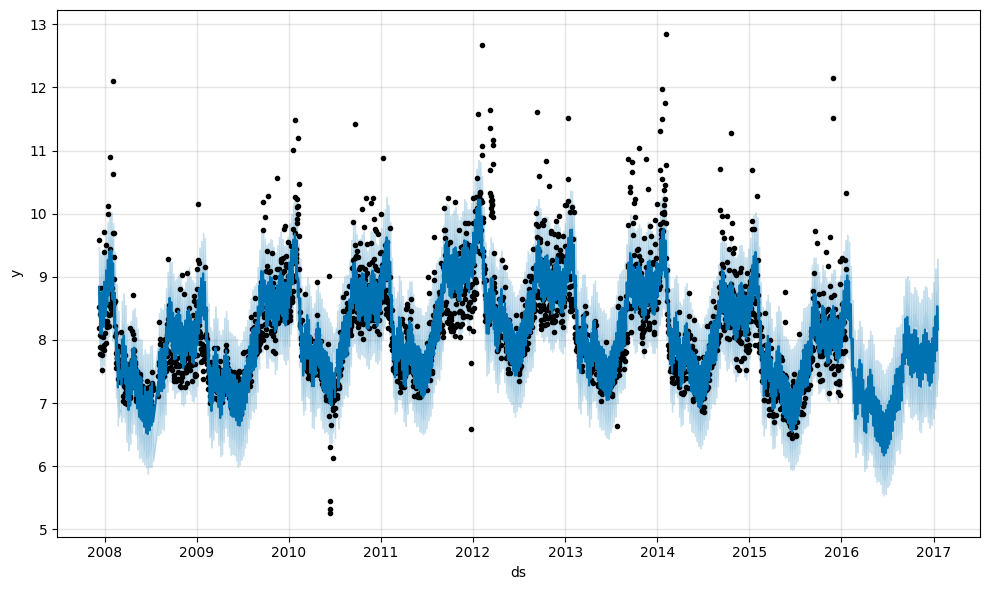

In [26]:
fig = model.plot(forecast)

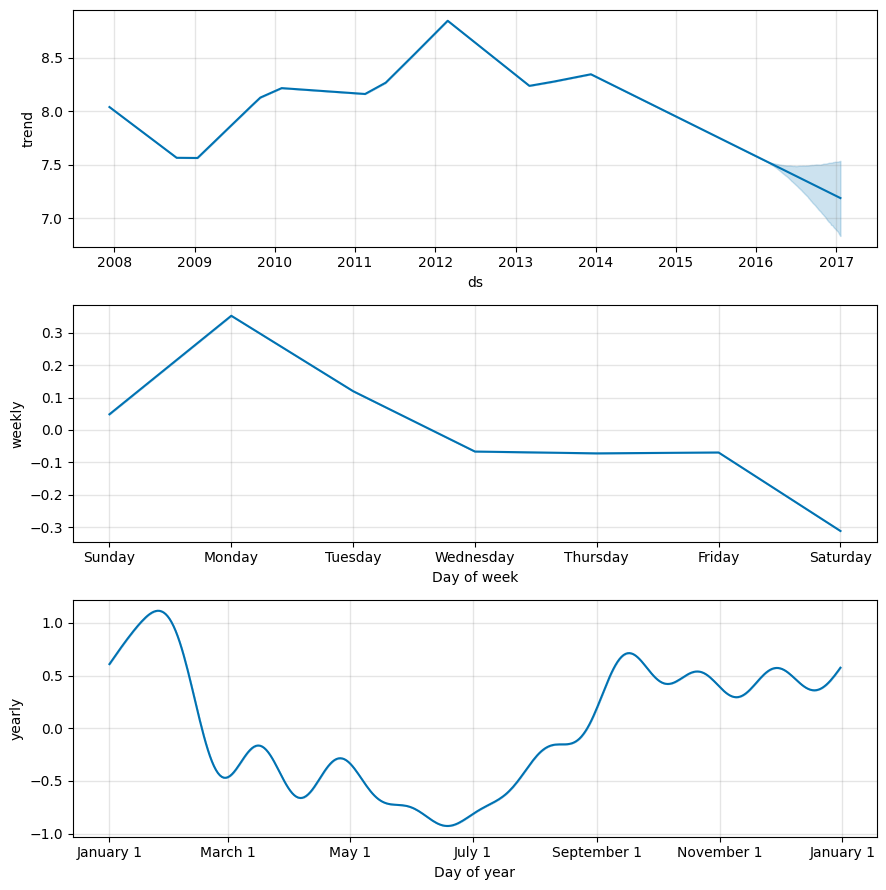

In [25]:
fig = model.plot_components(forecast)

In [28]:
plot_plotly(model, forecast)

In [29]:
plot_components_plotly(model, forecast)